# Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_time_series(
    time_series: pd.DataFrame,
    fitted_curve: pd.DataFrame = None,
    predictions: pd.DataFrame = None,
    num_series: int = None,
) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:
        plt.axvline(predictions.index[0], color="red", linestyle="--")

    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")  # Move legend to right corner
    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
df = pd.read_csv("data/share_energy_source.csv")
df["Year"] = [pd.Period(x) for x in df["Year"]]
df = df.set_index("Year")

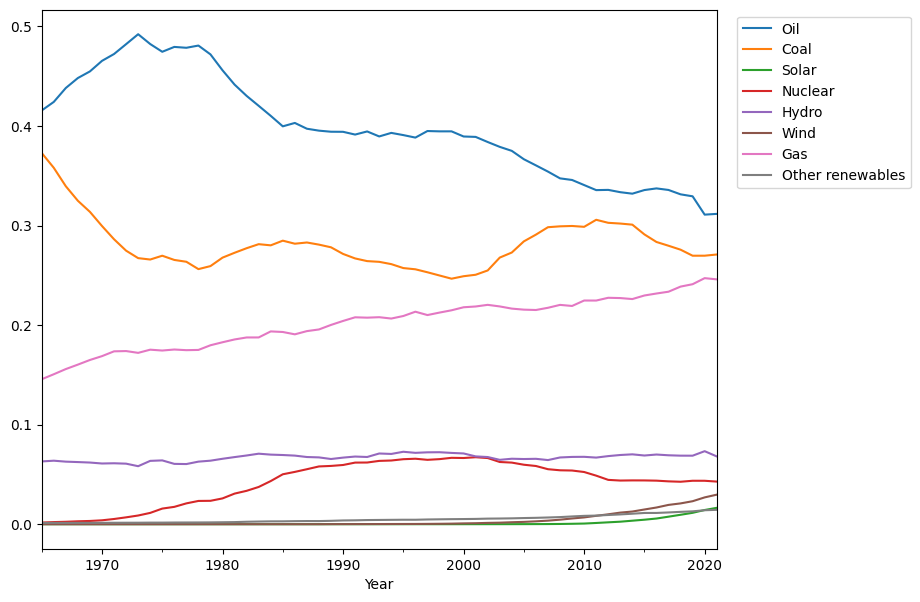

In [4]:
plot_time_series(df)

In [5]:
%%time
from compotime.preprocess import treat_small
from compotime import LocalLevelForecaster

horizon = 10

df = treat_small(df, 0.005)

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 845 ms, sys: 242 ms, total: 1.09 s
Wall time: 845 ms


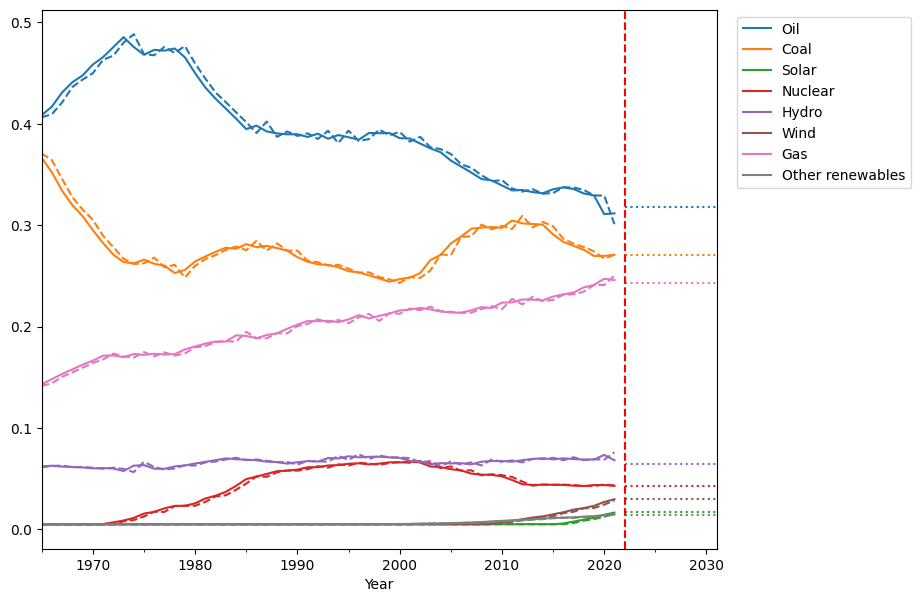

In [6]:
plot_time_series(df, model.fitted_curve_, predictions)

In [7]:
%%time
from compotime import LocalTrendForecaster

horizon = 10

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

CPU times: user 1.29 s, sys: 5.64 ms, total: 1.3 s
Wall time: 1.29 s


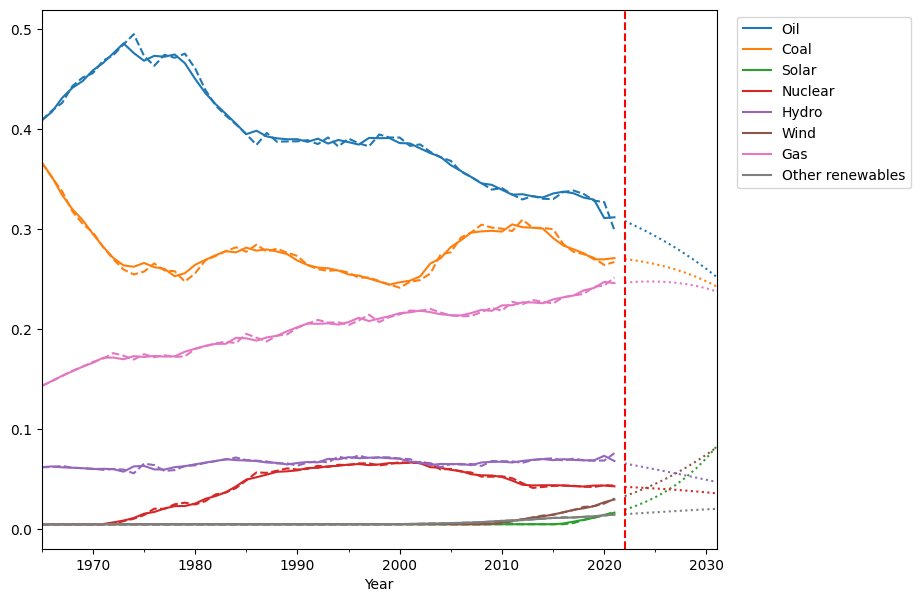

In [8]:
plot_time_series(df, model.fitted_curve_, predictions)